In [63]:
#importing various models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
#importing the csv files
file_path = 'vgsales.csv'
data = pd.read_csv(file_path)

In [67]:
#printing the original data
print("Original Data:")
print(data.head())

Original Data:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [69]:
# dropping rank (avoid redundancy) and name (irrelevant to prediction)
data_cleaned = data.drop(['Rank', 'Name'], axis=1)
print("\nData after dropping 'Rank' and 'Name':")
print(data_cleaned.head())


Data after dropping 'Rank' and 'Name':
  Platform    Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      Wii  2006.0        Sports  Nintendo     41.49     29.02      3.77   
1      NES  1985.0      Platform  Nintendo     29.08      3.58      6.81   
2      Wii  2008.0        Racing  Nintendo     15.85     12.88      3.79   
3      Wii  2009.0        Sports  Nintendo     15.75     11.01      3.28   
4       GB  1996.0  Role-Playing  Nintendo     11.27      8.89     10.22   

   Other_Sales  Global_Sales  
0         8.46         82.74  
1         0.77         40.24  
2         3.31         35.82  
3         2.96         33.00  
4         1.00         31.37  


In [71]:
#data cleaning
data_cleaned['Year'] = data_cleaned['Year'].fillna(data_cleaned['Year'].median())  
data_cleaned['Publisher'] = data_cleaned['Publisher'].fillna(data_cleaned['Publisher'].mode()[0]) 
print("\nData after handling missing values:")
print(data_cleaned.head())


Data after handling missing values:
  Platform    Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      Wii  2006.0        Sports  Nintendo     41.49     29.02      3.77   
1      NES  1985.0      Platform  Nintendo     29.08      3.58      6.81   
2      Wii  2008.0        Racing  Nintendo     15.85     12.88      3.79   
3      Wii  2009.0        Sports  Nintendo     15.75     11.01      3.28   
4       GB  1996.0  Role-Playing  Nintendo     11.27      8.89     10.22   

   Other_Sales  Global_Sales  
0         8.46         82.74  
1         0.77         40.24  
2         3.31         35.82  
3         2.96         33.00  
4         1.00         31.37  


In [73]:
# data encoding
label_encoder = LabelEncoder()
for column in ['Platform', 'Genre', 'Publisher']:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])
print("\nData after encoding categorical columns:")
print(data_cleaned.head())


Data after encoding categorical columns:
   Platform    Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
0        26  2006.0     10        359     41.49     29.02      3.77   
1        11  1985.0      4        359     29.08      3.58      6.81   
2        26  2008.0      6        359     15.85     12.88      3.79   
3        26  2009.0     10        359     15.75     11.01      3.28   
4         5  1996.0      7        359     11.27      8.89     10.22   

   Other_Sales  Global_Sales  
0         8.46         82.74  
1         0.77         40.24  
2         3.31         35.82  
3         2.96         33.00  
4         1.00         31.37  


In [75]:
#choosing relevant columns
features = ['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X = data_cleaned[features]
y = data_cleaned['Global_Sales']

In [77]:
# data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeatures after scaling:")
print(pd.DataFrame(X_scaled, columns=features).head())


Features after scaling:
   Platform      Year     Genre  Publisher   NA_Sales   EU_Sales   JP_Sales  \
0  1.215677 -0.071977  1.348221   0.371407  50.480508  57.136930  11.938058   
1 -0.571730 -3.704245 -0.246717   0.371407  35.284437   6.794188  21.767296   
2  1.215677  0.273954  0.284929   0.371407  19.084273  25.197785  12.002724   
3  1.215677  0.446919  1.348221   0.371407  18.961823  21.497277  10.353740   
4 -1.286693 -1.801628  0.550752   0.371407  13.476053  17.302048  32.792857   

   Other_Sales  
0    44.606085  
1     3.828224  
2    17.297115  
3    15.441165  
4     5.047848  


In [79]:
#25% test, 75% train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=77)

In [81]:
#applying models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=77)
}

In [83]:
#predictions, mean square error and variance
predictions = {}
mse_values = {}
r2_values = {}

In [85]:
for model_name, model in models.items():
    print(f"\nTraining {model_name}")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    predictions[model_name] = y_pred  # Store predictions
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    r2 = r2_score(y_test, y_pred)  # Calculate R2 score
    mse_values[model_name] = mse
    r2_values[model_name] = r2
    print(f"{model_name} Results:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}\n")


Training Linear Regression
Linear Regression Results:
Mean Squared Error (MSE): 0.0000
R² Score: 1.0000


Training Random Forest Regressor
Random Forest Regressor Results:
Mean Squared Error (MSE): 0.5734
R² Score: 0.8171



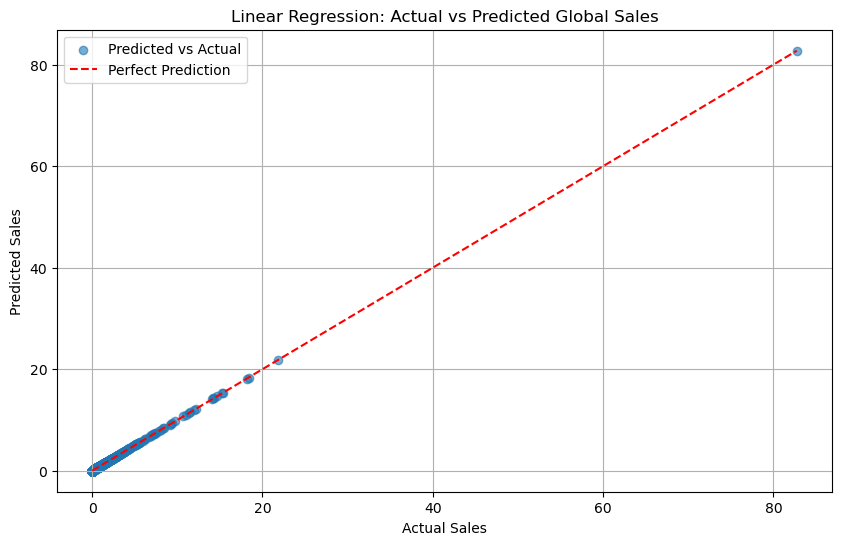

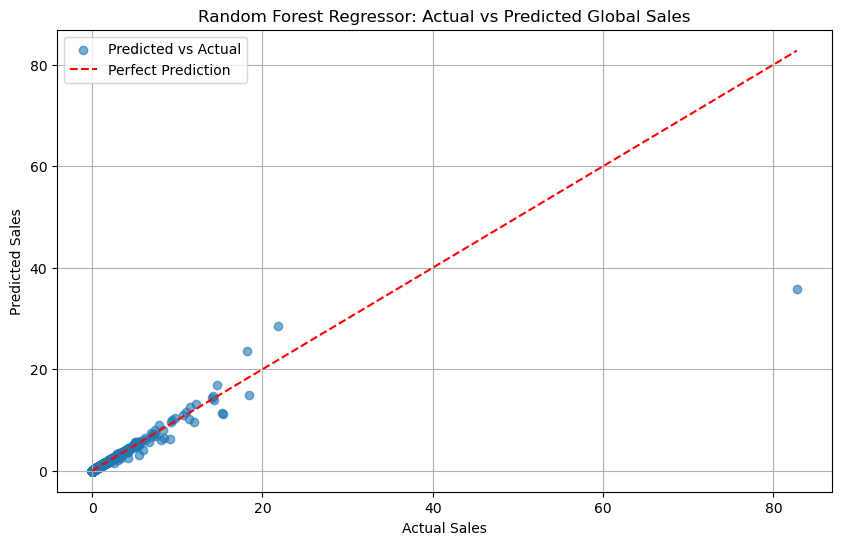

In [86]:
for model_name in models.keys():
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions[model_name], alpha=0.6, label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
    plt.title(f"{model_name}: Actual vs Predicted Global Sales")
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.legend()
    plt.grid()
    plt.show()

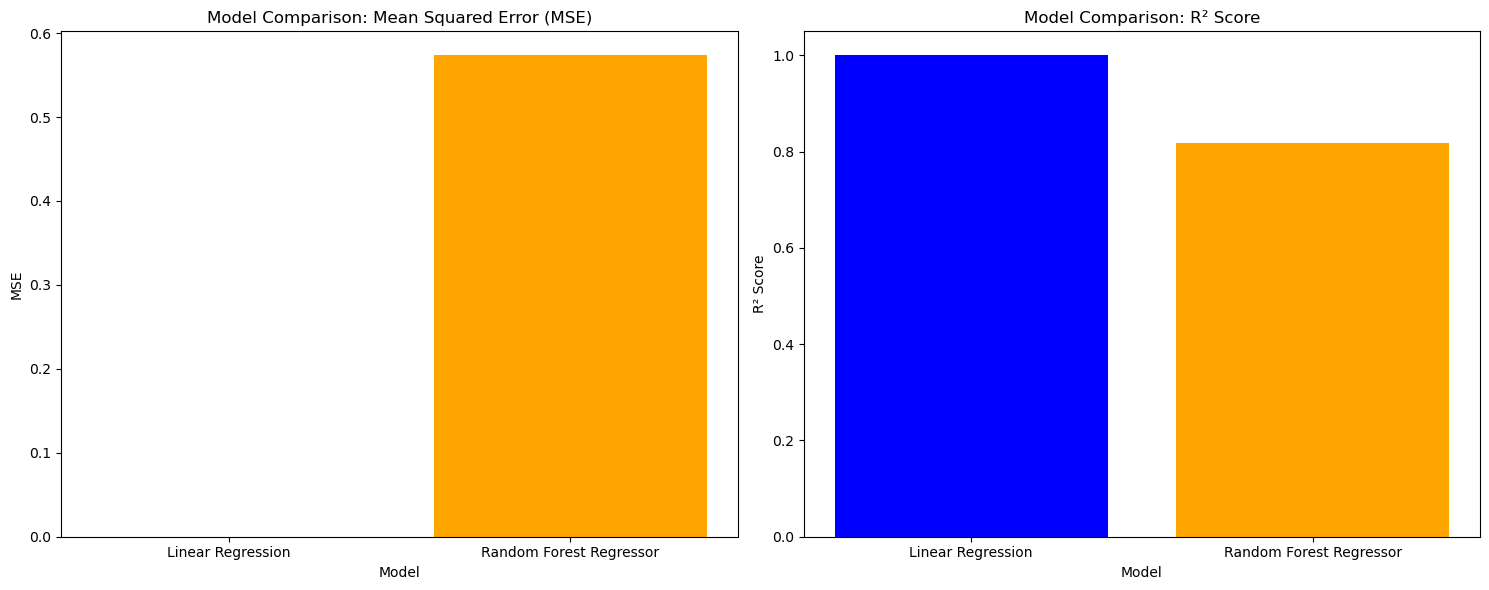

In [87]:
# Bar plot (compare MSE and R² score for both models)
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# MSE comparison
ax[0].bar(mse_values.keys(), mse_values.values(), color=['blue', 'orange'])
ax[0].set_title('Model Comparison: Mean Squared Error (MSE)')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Model')

#R² comparison
ax[1].bar(r2_values.keys(), r2_values.values(), color=['blue', 'orange'])
ax[1].set_title('Model Comparison: R² Score')
ax[1].set_ylabel('R² Score')
ax[1].set_xlabel('Model')

plt.tight_layout()
plt.show()